<a href="https://colab.research.google.com/github/manuel1729/Investigacion-de-operaciones/blob/main/Tarea_de_inventario_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inventario con descuento GÓMEZ CRUZ MANUEL

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## Ejemplo

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil. El servicio
compra aceite para motor a granel, a $\$3$ por galón. Si LubeCar compra más de 100 galones,
obtiene un descuento de $\$2.50$ por galón. En el servicio se atienden unos 150 autos diarios, y
cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo
de $\$0.02$ por galón y por día. También, el costo de colocar un pedido de aceite a granel es
de $\$20$. Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

In [ ]:
# Definimos los simbolos y funciones
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
T=sp.Function("T")
Qo=sp.Function("Qo")

In [ ]:
c1=3
c2=2.5
d=187.5
h=0.02
K=20
L=2
q=1000
#Qop=612.3724

Paso 1. Calcular Q óptimo

In [13]:
def Qop(K,d,h):
    return np.sqrt((2*K*d)/h)

In [ ]:
Qo=Qop(K,d,h)

In [ ]:
Qo

612.3724356957945

Paso 2. Determinar la zona en que se encuentra q

In [ ]:
def T(Q):
    if Q <= q:
        f=c1*d+K*d/Q+h*Q/2
    else:
        f=c2*d+K*d/Q+h*Q/2
    return f

In [ ]:
eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)

In [ ]:
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [ ]:
sol=sp.solve(eq,Q)

In [ ]:
sol

[35.4970848447485, 10564.2477865469]

In [ ]:
s=sol[1] #Aquí debemos seleccionar la solución que sea mayor que q

In [ ]:
s

10564.2477865469

Como $Qop=612 < q=1000 < Q = 10564$, q está en la zona II. Por tanto:

Qoo = q

**Ejercicio 1:** Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

Para calcular el tiempo de retraso efectivo

In [16]:
import numpy as np
import sympy as sp

def Q_optima_correcta(K, d, h, c1, c2, q):
    Q_star = np.sqrt(2 * K * d / h)

    # Costo total con c1 en Q*
    TC1 = c1 * d + K * d / Q_star + h * Q_star / 2

    # Costo total con c2 en q
    TC2_q = c2 * d + K * d / q + h * q / 2

    if Q_star >= q:
        # Q* es factible con descuento
        Q_opt = Q_star
        region = 'con_descuento'
        costo_min = c2 * d + K * d / Q_star + h * Q_star / 2
    else:
        # Q* no es factible con descuento, comparamos costos
        if TC2_q <= TC1:
            Q_opt = q
            region = 'con_descuento'
            costo_min = TC2_q
        else:
            Q_opt = Q_star
            region = 'sin_descuento'
            costo_min = TC1

    return Q_opt, region, costo_min


def Q_optima(K, d, h, c1, c2, q):
    # Primero, calculemos Qo (EOQ con c1)
    Qo = np.sqrt(2 * K * d / h)

    # Costo total en Qo con c1 (sin descuento)
    TC_Qo = c1 * d + K * d / Qo + h * Qo / 2

    # Resolvamos ecuación medel
    Q = sp.symbols('Q', positive=True, real=True)
    eq = sp.Eq(h * Q**2 + 2 * (c2 * d - TC_Qo) * Q + 2 * K * d, 0)

    soluciones = sp.solve(eq, Q)

    # Filtrar soluciones positivas reales
    soluciones_positivas = []
    for sol in soluciones:
        val = complex(sol.evalf())
        if abs(val.imag) < 1e-10 and val.real > 0:
            soluciones_positivas.append(val.real)

    print(f"Qo (EOQ c1) = {Qo:.2f}")
    print(f"TC(Qo) = {TC_Qo:.2f}")
    print(f"Soluciones de la cuadrática: {soluciones_positivas}")

    # Ahora aplicamos el algoritmo correcto
    if soluciones_positivas:
        # La solución mayor es la que nos interesa (si hay dos positivas)
        Q_cuad = max(soluciones_positivas)
        Q_star = Qo  # Q* es el mismo para c1 y c2 en EOQ básico

        if Q_star >= q:
            # Puedo pedir Q* con descuento
            Q_opt = Q_star
            region = 'con_descuento'
        else:
            # Comparar costos
            TC_q_descuento = c2 * d + K * d / q + h * q / 2
            TC_Qstar_sin = c1 * d + K * d / Q_star + h * Q_star / 2

            if TC_q_descuento <= TC_Qstar_sin:
                Q_opt = q
                region = 'con_descuento'
            else:
                Q_opt = Q_star
                region = 'sin_descuento'
    else:
        # Si no hay soluciones, usar el método estándar
        Q_opt, region, _ = Q_optima_correcta(K, d, h, c1, c2, q)

    return Q_opt, region


# Prueba con los valores profe xd
if __name__ == "__main__":
    c1=3
    c2=2.5
    d=187.5
    h=0.02
    K=20
    L=2
    q=1000

    print("=== Método Estándar (Correcto) ===")
    Q_opt, region, costo = Q_optima_correcta(K, d, h, c1, c2, q)
    print(f"Q óptima: {Q_opt:.2f}")
    print(f"Región: {region}")
    print(f"Costo mínimo anual: {costo:.2f}")

    print("\n=== Método con Ecuación Cuadrática ===")
    Q_opt2, region2 = Q_optima(K, d, h, c1, c2, q)
    print(f"Q óptima: {Q_opt2:.2f}")
    print(f"Región: {region2}")

    # Mostrar cálculos intermedios
    print("\n=== Cálculos Intermedios ===")
    Q_star = np.sqrt(2 * K * d / h)
    print(f"Q* (EOQ básico) = √(2*{K}*{d}/{h}) = {Q_star:.2f}")

    if Q_star >= q:
        print(f"Como {Q_star:.2f} ≥ {q}, podemos pedir Q* con descuento")
        print(f"Q_opt = {Q_star:.2f}, Región: con_descuento")
    else:
        print(f"Como {Q_star:.2f} < {q}, NO podemos pedir Q* con descuento")

        TC_q_descuento = c2 * d + K * d / q + h * q / 2
        TC_Qstar_sin = c1 * d + K * d / Q_star + h * Q_star / 2

        print(f"\nCosto en q={q} con descuento: {TC_q_descuento:.2f}")
        print(f"Costo en Q*={Q_star:.2f} sin descuento: {TC_Qstar_sin:.2f}")

        if TC_q_descuento <= TC_Qstar_sin:
            print(f"Como {TC_q_descuento:.2f} ≤ {TC_Qstar_sin:.2f}, pedimos en q")
            print(f"Q_opt = {q}, Región: con_descuento")
        else:
            print(f"Como {TC_q_descuento:.2f} > {TC_Qstar_sin:.2f}, pedimos Q*")
            print(f"Q_opt = {Q_star:.2f}, Región: sin_descuento")

=== Método Estándar (Correcto) ===
Q óptima: 1000.00
Región: con_descuento
Costo mínimo anual: 482.50

=== Método con Ecuación Cuadrática ===
Qo (EOQ c1) = 612.37
TC(Qo) = 574.75
Soluciones de la cuadrática: [35.497084844748485, 10564.247786546852]
Q óptima: 1000.00
Región: con_descuento

=== Cálculos Intermedios ===
Q* (EOQ básico) = √(2*20*187.5/0.02) = 612.37
Como 612.37 < 1000, NO podemos pedir Q* con descuento

Costo en q=1000 con descuento: 482.50
Costo en Q*=612.37 sin descuento: 574.75
Como 482.50 ≤ 574.75, pedimos en q
Q_opt = 1000, Región: con_descuento


In [ ]:
t1=Qo/d
np.floor(L/t1)

0.0

Por tanto la política del inventario debe ser:

In [ ]:
print("Pedir", q, "cuando el inventario caiga a:", L*d)

Pdir 1000 cuando el inventario caiga a: 375.0


**Ejercicio 2:** Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [15]:
#Ponga aquí su respuesta
def  politica_inventario(c1, c2, d, h, K, L, q):
  Qo=Qop(K,d,h)
  t1=Qo/d
  if Qo<q:
    print("Pedir", q, "cuando el inventario caiga a:", L*d)
  else:
    print("Pedir", Qo, "cuando el inventario caiga a:", L*d)

politica_inventario(c1, c2, d, h, K, L, q)

Pedir 1000 cuando el inventario caiga a: 375.0


Para graficar

In [ ]:
def T(Q, c1, c2, h, K, d, q):
    Q = np.array(Q)

    c = np.where(Q <= q, c1, c2)   # opciones

    return c*d + (K*d)/Q + (h*Q)/2

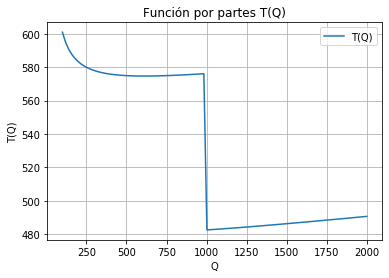

In [ ]:
Q_vals = np.linspace(100, 2000, 100)

T_vals = T(Q_vals, c1, c2, h, K, d, q)

plt.plot(Q_vals, T_vals, label="T(Q)")
#plt.axvline(q, color='red', linestyle='--', label="q")  # marca el punto de quiebre

plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()